A análise diagnóstica é um passo além da análise descritiva, focando em entender as causas por trás dos padrões e anomalias observadas nos dados. Em vez de apenas descrever o que está acontecendo, a análise diagnóstica tenta responder à pergunta "Por que isso está acontecendo?".

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

np.random.seed(42)
dates = pd.date_range(start="2023-01-01", end="2024-01-01")
sales = np.random.normal(500, 50, len(dates)).astype(int)

sales[dates.month == 6] = sales[dates.month == 6] * 0.5

df_sales = pd.DataFrame({
    'Data': dates,
    'Vendas': sales
})

df_sales.head()

,Data,Vendas
0,2023-01-01,524
1,2023-01-02,493
2,2023-01-03,532
3,2023-01-04,576
4,2023-01-05,488


Identificar a Queda nas Vendas

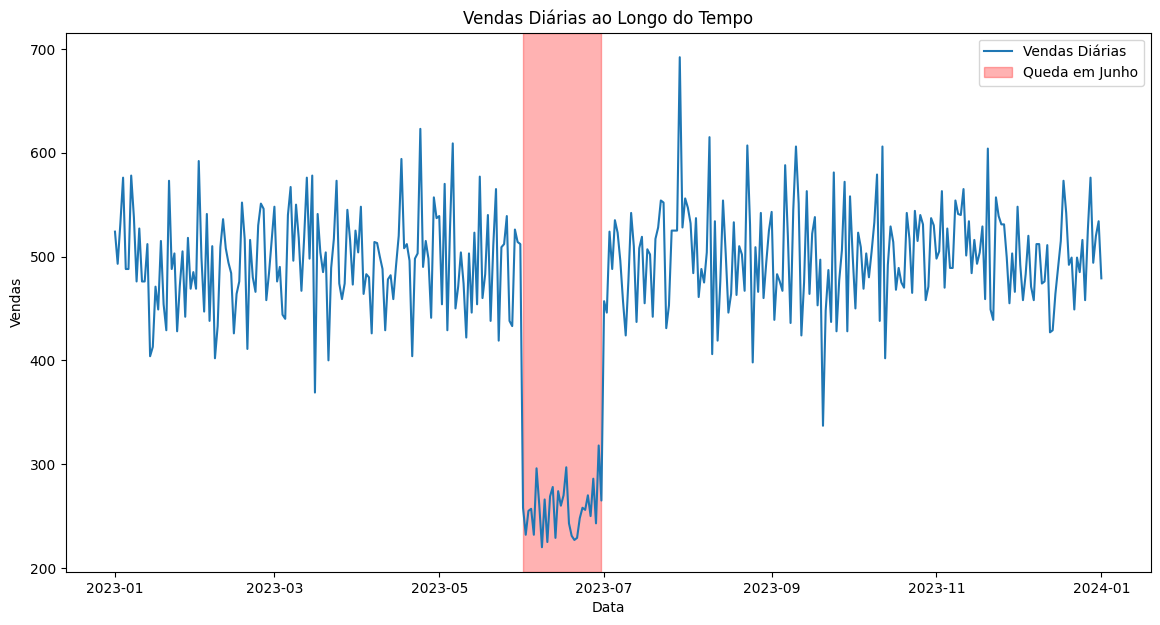

In [12]:
plt.figure(figsize=(14, 7))
plt.plot(df_sales['Data'], df_sales['Vendas'], label='Vendas Diárias')
plt.axvspan(datetime(2023, 6, 1), datetime(2023, 6, 30), color='red', alpha=0.3, label='Queda em Junho')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Vendas Diárias ao Longo do Tempo')
plt.legend()
plt.show()

In [26]:
# Gerar dados adicionais por categoria de produto
df_sales['Categoria'] = np.random.choice(['Eletrônicos', 'Roupas', 'Alimentos'], len(df_sales))
df_sales['Receita'] = df_sales['Vendas'] * np.random.uniform(10, 100, len(df_sales))

# Analisar as vendas por categoria em junho
vendas_junho = df_sales[(df_sales['Data'].dt.month == 6)]
vendas_junho_por_categoria = vendas_junho.groupby('Categoria')['Vendas'].sum()

# Comparar com as vendas médias dos outros meses
vendas_outros_meses = df_sales[df_sales['Data'].dt.month != 6]
vendas_media_outros_meses = vendas_outros_meses.groupby('Categoria')['Vendas'].mean() * len(vendas_junho) / len(vendas_outros_meses)

# Calculando a soma das vendas nos outros meses
vendas_soma_outros_meses = vendas_outros_meses.groupby('Categoria')['Vendas'].sum()

# Calculando a média diária dos outros meses
media_diaria_outros_meses = vendas_soma_outros_meses / len(vendas_outros_meses['Data'].dt.month.unique())

# Comparação direta entre vendas de junho e média dos outros meses
comparacao_vendas = pd.DataFrame({
    'Vendas Junho': vendas_junho_por_categoria,
    'Média Diária Outros Meses': media_diaria_outros_meses
})

# Ajustando a variação percentual
comparacao_vendas['Variação (%)'] = (((comparacao_vendas['Vendas Junho'] - comparacao_vendas['Média Diária Outros Meses']) / comparacao_vendas['Média Diária Outros Meses'])*-1) * 100

comparacao_vendas

,Vendas Junho,Média Diária Outros Meses,Variação (%)
Categoria,,,
Alimentos,2626,5233.181818,49.820203
Eletrônicos,2793,5121.636364,45.466648
Roupas,2284,4877.272727,53.170550


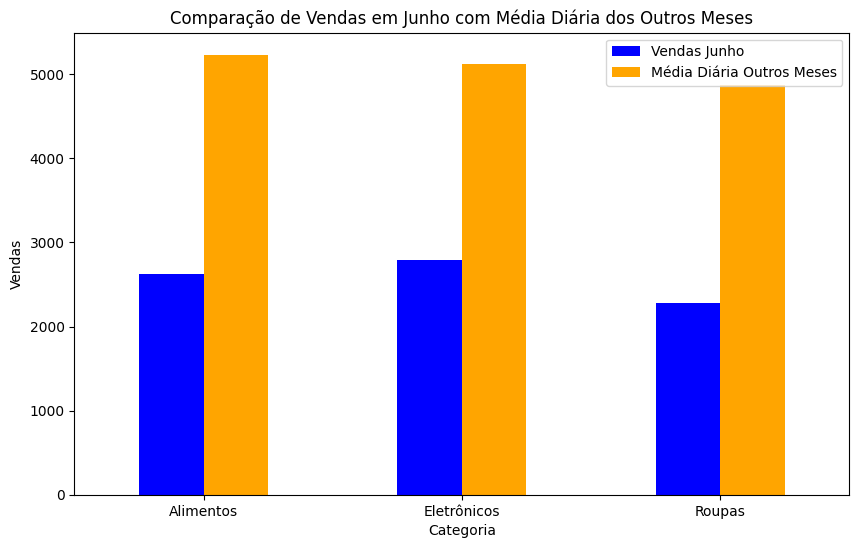

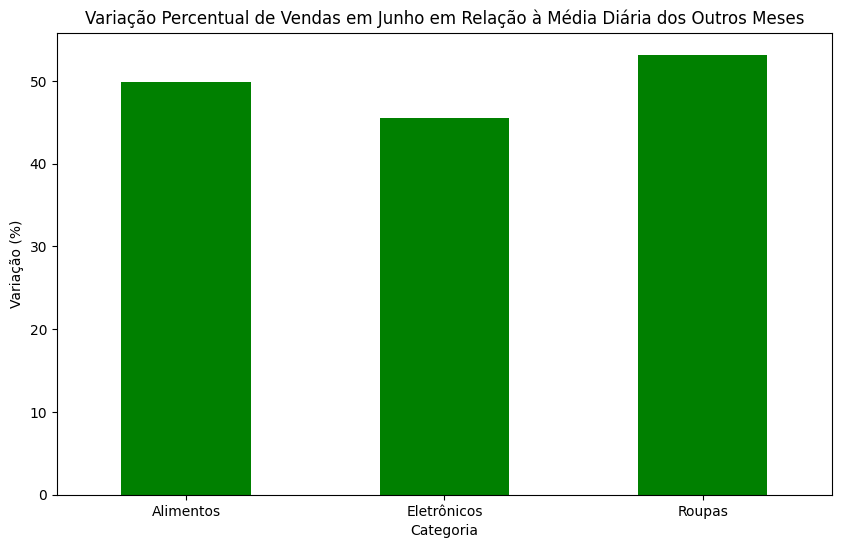

In [27]:
import matplotlib.pyplot as plt

# Plotando o gráfico de barras comparando as vendas de junho com a média diária dos outros meses
comparacao_vendas[['Vendas Junho', 'Média Diária Outros Meses']].plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])
plt.title('Comparação de Vendas em Junho com Média Diária dos Outros Meses')
plt.ylabel('Vendas')
plt.xticks(rotation=0)
plt.show()

# Plotando o gráfico de barras da variação percentual
comparacao_vendas['Variação (%)'].plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Variação Percentual de Vendas em Junho em Relação à Média Diária dos Outros Meses')
plt.ylabel('Variação (%)')
plt.xticks(rotation=0)
plt.show()